<a href="https://colab.research.google.com/github/stephenbeckr/numerical-analysis-class/blob/master/Demos/Ch4_integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Integration (quadrature)

- See also Prof. Brown's [integration notebook](https://github.com/cu-numcomp/numcomp-class/blob/master/Integration.ipynb) for CSCI-3656   [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cu-numcomp/numcomp-class/blob/master/Integration.ipynb)
- Bengt Fornberg's talk [Gregory formulas and improving on the Trapezoidal rule](https://www.colorado.edu/amath/sites/default/files/attached-files/2019_unm_0.pdf)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BarycentricInterpolator as interp

# From Table 9.2 in Quarteroni, Sacco and Saleri "Numerical Mathematics" (Springer, 2000)
ClosedNewtonCotesWeights = { 1:[1/2,1/2], 2:[1/3,4/3,1/3], 3:[3/8,9/8,9/8,3/8], 4:[14/45, 64/45, 24/45, 64/45, 14/45], 
    5:[95/288, 375/288,250/288, 250/288, 375/288, 95/288], 6:[41/140,216/140,27/140,272/140,27/140,216/140,41/140]}
ClosedNewtonCotesNames = {1:"n=1, Trapezoid", 2:"n=2, Simpson's", 3:"n=3, Simpson's 3/8", 4:"n=4, Boole's", 5:"n=5", 6:"n=6"}

Integral I is 1.751


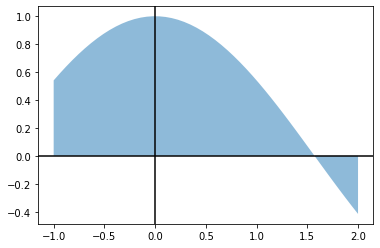

In [96]:
f = lambda x : np.cos(x)
F = lambda x : np.sin(x)  # dF/dx = f
a,b = -1,2


# Other examples to try
# f = lambda x : x**(3/2)
# F = lambda x : 2/5*x**(5/2)
# a,b = 0,1

# f = lambda x : 1/(1+x**2)  # aka Runge's function
# F = lambda x : np.arctan(x)
# a,b = -5,5



I   = F(b) - F(a)
print("Integral I is {:.3f}".format(I))

x = np.linspace(a,b)
plt.fill_between( x, f(x), alpha=0.5);
plt.axvline(color='k');
plt.axhline(color='k');

### Try the Trapezoidal rule, n = 2

Using the rule:  n=1, Trapezoid
True integral: 1.751, Estimate: 0.186, Abs. Error: 1.56454


([-1.0, 2.0], 3.0, [0.5, 0.5])

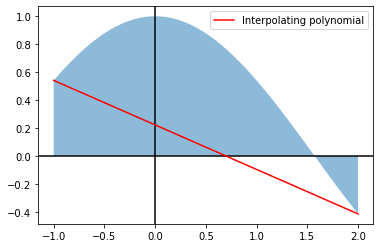

In [97]:
n = 1
print("Using the rule: ", ClosedNewtonCotesNames[n] )
weights   = ClosedNewtonCotesWeights[n]
(nodes,h) = np.linspace(a,b,n+1,retstep=True) # retstep tells it to return the spacing h

I_estimate = h*np.dot( weights, f(nodes) )
p          = interp(nodes,f(nodes))

x = np.linspace(a,b)
plt.fill_between( x, f(x), alpha=0.5);
plt.axvline(color='k');
plt.axhline(color='k');
plt.plot( x, p(x), 'r-', label="Interpolating polynomial" )
plt.legend()

print("True integral: {:.3f}, Estimate: {:.3f}, Abs. Error: {:.5f}".format(I,I_estimate,abs(I-I_estimate)))
nodes.tolist(),h,weights

Using the rule:  n=2, Simpson's
True integral: 1.751, Estimate: 1.817, Abs. Error: 0.06647


/usr/local/lib/python3.6/dist-packages/scipy/interpolate/polyint.py:609: RuntimeWarning: divide by zero encountered in true_divide
  p = np.dot(c,self.yi)/np.sum(c,axis=-1)[...,np.newaxis]


([-1.0, 0.5, 2.0],
 1.5,
 [0.3333333333333333, 1.3333333333333333, 0.3333333333333333])

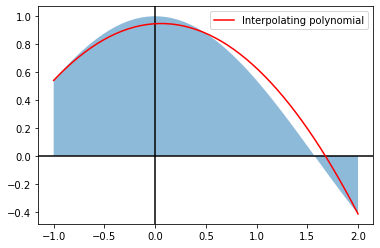

In [98]:
n = 2
print("Using the rule: ", ClosedNewtonCotesNames[n] )
weights   = ClosedNewtonCotesWeights[n]
(nodes,h) = np.linspace(a,b,n+1,retstep=True) # retstep tells it to return the spacing h

I_estimate = h*np.dot( weights, f(nodes) )
p          = interp(nodes,f(nodes))

x = np.linspace(a,b)
plt.fill_between( x, f(x), alpha=0.5);
plt.axvline(color='k');
plt.axhline(color='k');
plt.plot( x, p(x), 'r-', label="Interpolating polynomial" )
plt.legend()

print("True integral: {:.3f}, Estimate: {:.3f}, Abs. Error: {:.5f}".format(I,I_estimate,abs(I-I_estimate)))
nodes.tolist(),h,weights

Using the rule:  n=3, Simpson's 3/8
True integral: 1.751, Estimate: 1.779, Abs. Error: 0.02863


([-1.0, 0.0, 1.0, 2.0], 1.0, [0.375, 1.125, 1.125, 0.375])

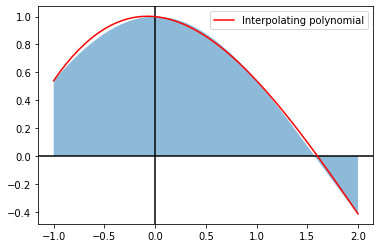

In [99]:
n = 3
print("Using the rule: ", ClosedNewtonCotesNames[n] )
weights   = ClosedNewtonCotesWeights[n]
(nodes,h) = np.linspace(a,b,n+1,retstep=True) # retstep tells it to return the spacing h

I_estimate = h*np.dot( weights, f(nodes) )
p          = interp(nodes,f(nodes))

x = np.linspace(a,b)
plt.fill_between( x, f(x), alpha=0.5);
plt.axvline(color='k');
plt.axhline(color='k');
plt.plot( x, p(x), 'r-', label="Interpolating polynomial" )
plt.legend()

print("True integral: {:.3f}, Estimate: {:.3f}, Abs. Error: {:.5f}".format(I,I_estimate,abs(I-I_estimate)))
nodes.tolist(),h,weights

Using the rule:  n=4, Boole's
True integral: 1.751, Estimate: 1.750, Abs. Error: 0.00092


([-1.0, -0.25, 0.5, 1.25, 2.0],
 0.75,
 [0.3111111111111111,
  1.4222222222222223,
  0.5333333333333333,
  1.4222222222222223,
  0.3111111111111111])

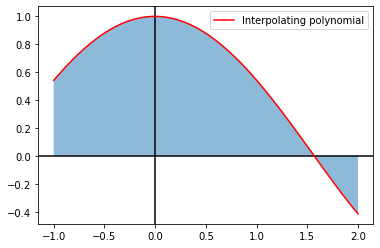

In [100]:
n = 4
print("Using the rule: ", ClosedNewtonCotesNames[n] )
weights   = ClosedNewtonCotesWeights[n]
(nodes,h) = np.linspace(a,b,n+1,retstep=True) # retstep tells it to return the spacing h

I_estimate = h*np.dot( weights, f(nodes) )
p          = interp(nodes,f(nodes))

x = np.linspace(a,b)
plt.fill_between( x, f(x), alpha=0.5);
plt.axvline(color='k');
plt.axhline(color='k');
plt.plot( x, p(x), 'r-', label="Interpolating polynomial" )
plt.legend()

print("True integral: {:.3f}, Estimate: {:.3f}, Abs. Error: {:.5f}".format(I,I_estimate,abs(I-I_estimate)))
nodes.tolist(),h,weights

Using the rule:  n=5
True integral: 1.751, Estimate: 1.750, Abs. Error: 0.00051


([-1.0, -0.4, 0.19999999999999996, 0.7999999999999998, 1.4, 2.0],
 0.6,
 [0.3298611111111111,
  1.3020833333333333,
  0.8680555555555556,
  0.8680555555555556,
  1.3020833333333333,
  0.3298611111111111])

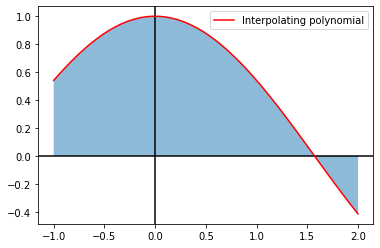

In [101]:
n = 5
print("Using the rule: ", ClosedNewtonCotesNames[n] )
weights   = ClosedNewtonCotesWeights[n]
(nodes,h) = np.linspace(a,b,n+1,retstep=True) # retstep tells it to return the spacing h

I_estimate = h*np.dot( weights, f(nodes) )
p          = interp(nodes,f(nodes))

x = np.linspace(a,b)
plt.fill_between( x, f(x), alpha=0.5);
plt.axvline(color='k');
plt.axhline(color='k');
plt.plot( x, p(x), 'r-', label="Interpolating polynomial" )
plt.legend()

print("True integral: {:.3f}, Estimate: {:.3f}, Abs. Error: {:.5f}".format(I,I_estimate,abs(I-I_estimate)))
nodes.tolist(),h,weights

Using the rule:  n=6
True integral: 1.751, Estimate: 1.751, Abs. Error: 0.00001


([-1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0],
 0.5,
 [0.29285714285714287,
  1.542857142857143,
  0.19285714285714287,
  1.9428571428571428,
  0.19285714285714287,
  1.542857142857143,
  0.29285714285714287])

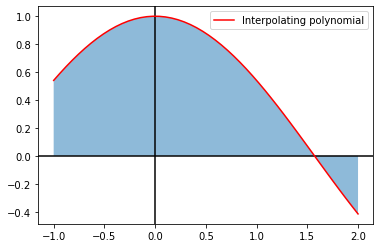

In [102]:
n = 6
print("Using the rule: ", ClosedNewtonCotesNames[n] )
weights   = ClosedNewtonCotesWeights[n]
(nodes,h) = np.linspace(a,b,n+1,retstep=True) # retstep tells it to return the spacing h

I_estimate = h*np.dot( weights, f(nodes) )
p          = interp(nodes,f(nodes))

x = np.linspace(a,b)
plt.fill_between( x, f(x), alpha=0.5);
plt.axvline(color='k');
plt.axhline(color='k');
plt.plot( x, p(x), 'r-', label="Interpolating polynomial" )
plt.legend()

print("True integral: {:.3f}, Estimate: {:.3f}, Abs. Error: {:.5f}".format(I,I_estimate,abs(I-I_estimate)))
nodes.tolist(),h,weights

## Let's try different kinds of functions

In [103]:
def tryAllRules( f, F, a, b):
  err = []
  for n in range(1,6+1):
    weights   = ClosedNewtonCotesWeights[n]
    (nodes,h) = np.linspace(a,b,n+1,retstep=True)
    I_estimate = h*np.dot( weights, f(nodes) )
    I   = F(b) - F(a) # True answer
    err.append( abs(I_estimate - I))
  return np.array( err )


f = lambda x : np.cos(x)
F = lambda x : np.sin(x)  # dF/dx = f
a,b = -1,2
err1 = tryAllRules( f, F, a, b)

# Other examples to try
f = lambda x : x**(3/2)
F = lambda x : 2/5*x**(5/2)
a,b = 0,1
err2 = tryAllRules( f, F, a, b)

f = lambda x : x**(11/2)
F = lambda x : 2/13*x**(5/13)
a,b = 0,1
err3 = tryAllRules( f, F, a, b)

# Runge's function
f = lambda x : 1/(1+x**2)
F = lambda x : np.arctan(x)
a,b = -5,5
err4 = tryAllRules( f, F, a, b)

print(np.array2string( np.array([err1,err2,err3,err4]).T, precision=2))

[[1.56e+00 1.00e-01 3.46e-01 2.36e+00]
 [6.65e-02 2.37e-03 2.76e-02 4.05e+00]
 [2.86e-02 1.29e-03 1.24e-02 6.65e-01]
 [9.15e-04 3.03e-04 1.22e-04 3.73e-01]
 [5.11e-04 2.11e-04 6.92e-05 4.39e-01]
 [1.04e-05 8.73e-05 5.90e-07 1.12e+00]]


### Let's examine Runge's function more closely
$$f(x) = \frac{1}{1+x^2}$$

Our error wasn't going down, but the function is $C^\infty(\mathbb{R})$. Did we make a mistake?

No, our formula was correct, the issue is that the $f'(\xi)$ term (and $f''(\xi)$, etc.) are very large.  One way to think of this issue is that the function has a **singularity** (though it is on the imaginary axis, at $\pm i$).

(Btw, how do you prounce Runge? It's German, and you can listen to native speakers say it [at Forvo](https://forvo.com/search/Runge/))

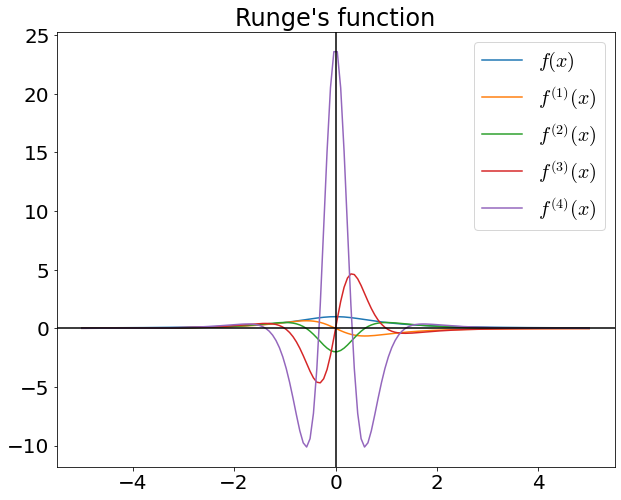

In [8]:
import sympy
from sympy.abc import x
from sympy import init_printing
from sympy.utilities.lambdify import lambdify
init_printing()
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams.update({'font.size': 20})


f = lambda x : 1/(1+x**2)
F = lambda x : np.arctan(x)
a,b = -5,5

g = 1/(1+x**2) # symbolic version

gNumerical = lambdify(x,g) # avoid sympy plotting
xGrid   = np.linspace(a,b,150)
plt.figure(figsize=(10,8)) 
plt.plot( xGrid, gNumerical(xGrid),label='$f(x)$' )


#k = 3  # order of derivative
for k in range(1,5):
  dg = lambdify(x,sympy.diff(g,x,k))
  plt.plot( xGrid, dg(xGrid), label="$f^{("+str(k)+")}(x)$");
plt.axvline(color='k');
plt.axhline(color='k');
#plt.legend(prop={'size': 20});
plt.legend()
plt.title("Runge's function");

#sympy.plot(g);  # sympy plots are not so nice

# sympy.plot(sympy.diff(g,x,k));